In [28]:
import pipit
import stumpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [21]:
trace = pipit.Trace.from_otf2(
    "/mnt/d/work/pipit-data/tortuga-otf2-16"
)
trace.calc_exc_metrics()
df = trace.events

In [22]:
iterations = len(
    df[
        (df["Name"] == "time-loop")
        & (df["Event Type"] == "Enter")
        & (df["Process"] == 0)
    ]
)
iterations

3

In [23]:
first_loop_enter = df[
    (df["Name"] == "time-loop")
    & (df["Event Type"] == "Enter")
    & (df["Process"] == 0)
].index[0]

last_loop_leave = df[
    (df["Name"] == "time-loop")
    & (df["Event Type"] == "Leave")
    & (df["Process"] == 0)
].index[-1]

df = df.iloc[first_loop_enter + 1 : last_loop_leave]
filtered_df = df.loc[(df["time.exc"].notnull()) & (df["Process"] == 0)] 

y = df.loc[(df["time.exc"].notnull()) & (df["Process"] == 0)]["time.exc"].values[:]

window_size = int(len(y) / iterations)

In [24]:
matrix_profile = stumpy.stump(y, window_size)
dists, indices = stumpy.motifs(y, matrix_profile[:, 0], max_matches=iterations)

/home/ocankur/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


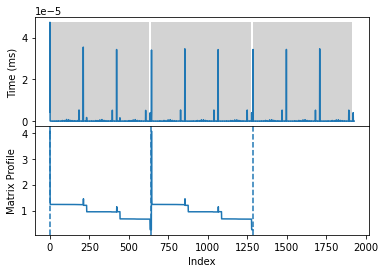

In [31]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"hspace": 0})
df["time.exc"] = df["time.exc"].div(1e6)

axs[0].plot(y)
axs[0].set_ylabel("Time (ms)")

for idx in indices[0]:
    rect = Rectangle((idx, 0), window_size * 0.98, y.max(), fill=True, facecolor="lightgrey")
    axs[0].add_patch(rect)

axs[1].set_xlabel("Index")
axs[1].set_ylabel("Matrix Profile")

for idx in indices[0]:
    axs[1].axvline(x=idx, linestyle="dashed")

axs[1].plot(matrix_profile[:, 0])